In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random

import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import axes3d

In [2]:
#Generate data - 3 clusters (1, 2, 3)
mean_1 = [2, 1, 1]
cov_1 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

mean_2 = [10, 3, 5]
cov_2 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

mean_3 = [8, 8, 8]
cov_3 = [[0.5, 0.1, 0.2], [0.1, 0.5, 0], [0.2, 0, 0.5]]

x1, y1, z1 = np.random.multivariate_normal(mean_1, cov_1, 1000, check_valid = 'ignore').T
x2, y2, z2 = np.random.multivariate_normal(mean_2, cov_2, 1000, check_valid = 'ignore').T
x3, y3, z3 = np.random.multivariate_normal(mean_3, cov_3, 1000, check_valid = 'ignore').T

In [3]:
#initialize centroids
k = 5 # declare # of centroids
centroids = np.zeros(shape=(k, 3))

for i in range(k):
    cx, cy, cz = random.uniform(0,10), random.uniform(0,10), random.uniform(0,10)
    new_row = [cx, cy, cz]
    centroids[i] = new_row
centroids

array([[4.10873635, 0.3483834 , 5.81115521],
       [0.42681603, 8.82194869, 1.50071509],
       [5.21301645, 9.34089291, 1.66657697],
       [2.32237065, 0.67151519, 7.32632307],
       [6.66752994, 2.42180985, 4.72717442]])

In [4]:
xs = [x1, x2, x3]
ys = [y1, y2, y3]
zs = [z1, z2, z3]

In [5]:
def plot_kmeans(xs, ys, zs, centroids, alpha=0.2):
    
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(xs[0], ys[0], zs[0], alpha = alpha)
    ax.scatter(xs[1], ys[1], zs[1], alpha = alpha)
    ax.scatter(xs[2], ys[2], zs[2], alpha = alpha)
    
    for i in range(centroids.shape[0]):
        c1x, c1y, c1z = centroids[i][0], centroids[i][1], centroids[i][2]
        ax.scatter(c1x, c1y, c1z, color = "black")

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.set_xlim(0, 12)
    ax.set_ylim(0, 12)
    ax.set_zlim(0, 12)

    ax.view_init(elev = 20, azim = 10)

    ax.invert_yaxis()

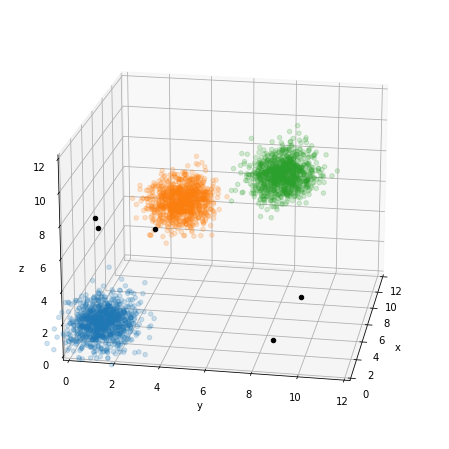

In [6]:
plot_kmeans(xs, ys, zs, centroids, alpha = 0.2)

In [7]:
#concatentate data
x = np.concatenate((x1, x2, x3), axis = 0)
y = np.concatenate((y1, y2, y3), axis = 0)
z = np.concatenate((z1, z2, z3), axis = 0)

In [8]:
def update_centroids(centroids, x, y, z):
    
    #Check to make sure array lengths are the same
    assert len(x) == len(y) and len(y) == len(z)
    
    #initialize stacks belonging to each centroid
    c_points = [[] for _ in range(k)]
    
    #calculate distance for each point and assign each point to the correct centroid
    for i in range(len(x)):
        cur_min_dist = (float('inf'), 0) #initialize min_dist to infinity and to centroid 0
        
        for c in range(centroids.shape[0]):
            
            #calculate distance
            dist = np.sqrt((x[i] - centroids[c][0])**2 + (y[i] - centroids[c][1])**2 + (z[i] - centroids[c][2])**2) 
            
            #if distance < min distance, update cur_min_dist
            if dist < cur_min_dist[0]:
                cur_min_dist = (dist, c)
            
        c_points[cur_min_dist[1]].append([x[i], y[i], z[i]])

    #update centroids
        
    for j in range(centroids.shape[0]):
        
        #convert each list to a np array
        tmp_c = np.array(c_points[j])
        
        #update the centroid with the mean of each column as coordinates
        
        ## if point list is empty, reinitialize centroid at the origin 
        ##(temporary - need to think of a better way of handling this)
        if len(tmp_c) == 0:
            centroids[j] = [0,0,0]
        
        else:
            centroids[j] = np.mean(tmp_c, axis=0)
    
    return centroids

Initial positions (step 0)


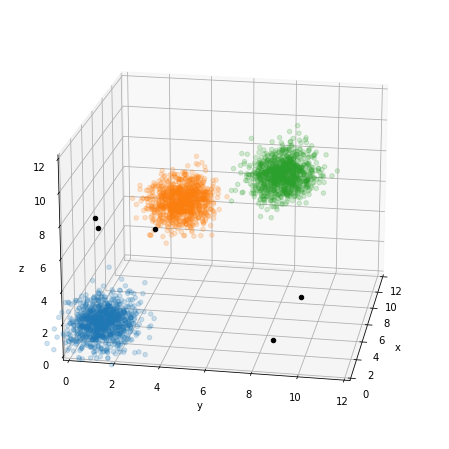

Step 1:


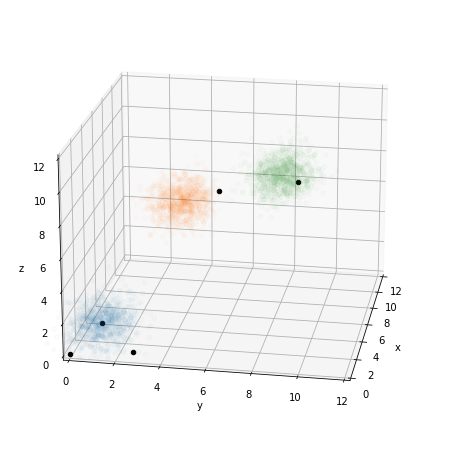

Step 2:


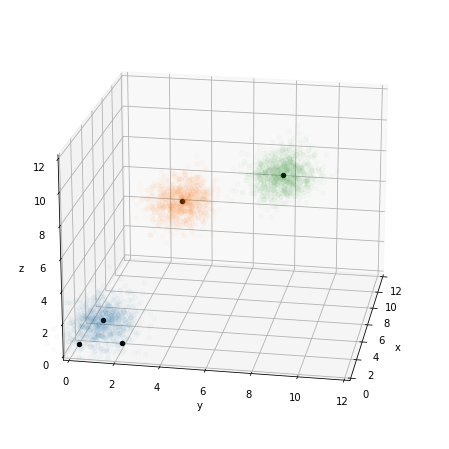

Step 3:


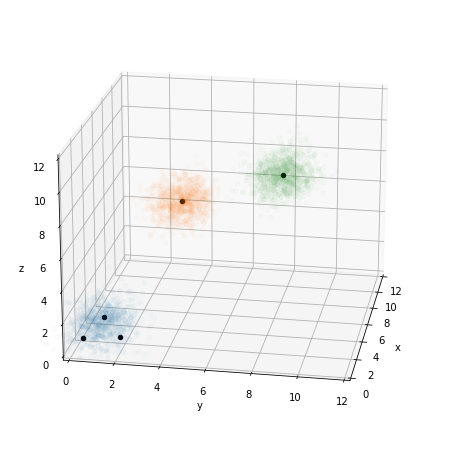

Step 4:


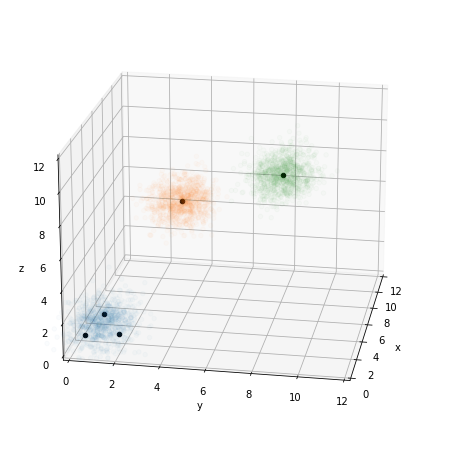

Step 5:


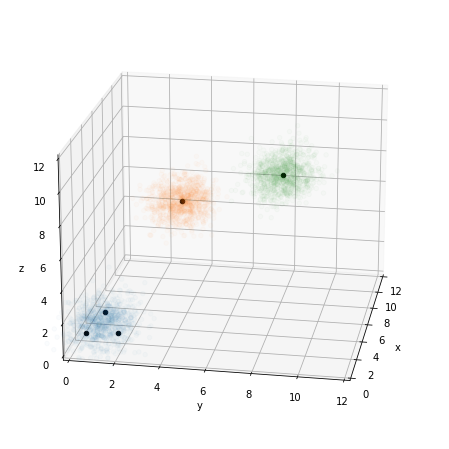

In [9]:
epochs = 5

print('Initial positions (step 0)')
plot_kmeans(xs, ys, zs, centroids, alpha=0.2)
plt.show()

for i in range(epochs):
    print(f"Step {i+1}:")
    centroids = update_centroids(centroids, x, y, z)
    # Create a joint plot
    plot_kmeans(xs, ys, zs, centroids, alpha=0.02)
    
    plt.show()